In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

# Preprocessing

In [3]:
obs = np.array([
    [2.5, 4.0],
    [3.0, 4.8],
    [1.33, 2.5],
    [5.2, 5.0]
], dtype = float)
obs

array([[2.5 , 4.  ],
       [3.  , 4.8 ],
       [1.33, 2.5 ],
       [5.2 , 5.  ]])

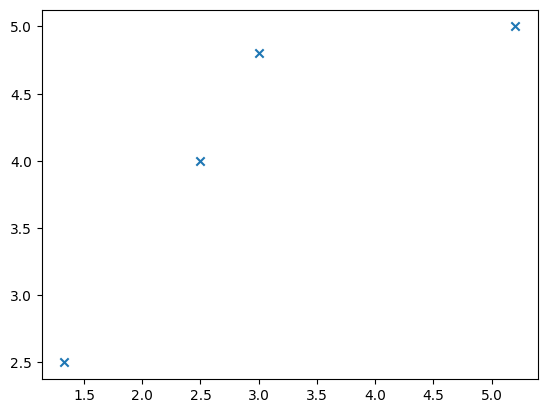

In [4]:
plt.scatter(obs[:,0], obs[:,1], marker='x')

In [5]:
x, y = np.split(obs, [1], axis = 1)
x, y

(array([[2.5 ],
        [3.  ],
        [1.33],
        [5.2 ]]),
 array([[4. ],
        [4.8],
        [2.5],
        [5. ]]))

In [6]:
x

array([[2.5 ],
       [3.  ],
       [1.33],
       [5.2 ]])

In [7]:
y = np.squeeze(y, axis = 1)
y

array([4. , 4.8, 2.5, 5. ])

# Gradient Descent

In [8]:
def f_w(w: np.ndarray):
    w = w.copy()
    
    def f(x: np.ndarray):
        return np.inner(x, w[1:]) + w[0]
    
    return f

In [14]:
def step_j(w, x, y):
    f = f_w(w)
    x = x
    y = y
    
    def step(j):
        sum = 0
        for xi,yi in zip(x,y):
            sum += 2 * (f(xi) - yi) * (xi[j - 1] if j != 0 else 1)
        return sum
    
    return step

In [15]:
w = np.zeros((2,))

In [16]:
w

array([0., 0.])

In [17]:
# Gradient Descent
for _ in range(1000):
    f = step_j(w, x, y)
    
    step = np.empty(w.shape)
    for j in range(w.size):
        step[j] = f(j)
        
    if np.all(np.abs(step) < 0.0001):
        break
    else:
        w = w - 0.01 * step
else:
    print("max iteration count")

In [18]:
w

array([2.2797603 , 0.59691679])

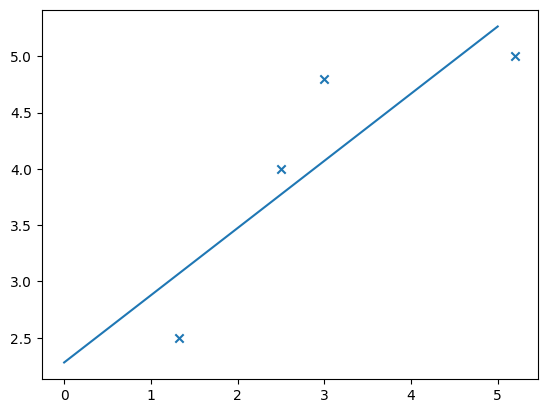

In [19]:
plt.scatter(x[:,0], y, marker = 'x')
plt.plot(w[1] * np.arange(6) + w[0])

# Stochastic Gradient Descent

In [20]:
w = np.zeros((2,))

In [21]:
w

array([0., 0.])

In [22]:
# Stochastic Gradient Descent
for _ in range(1000 // y.size):
    np.random.shuffle(obs)
    for xi, yi in zip(x, y):
        f = f_w(w)
        step = np.zeros(w.size)
        for j in range(w.size):
            step[j] = 2 * (f(xi) - yi) * (xi[j - 1] if j != 0 else 1)

        if np.all(np.abs(step) < 0.0001):
            break
        else:
            w = w - 0.01 * step
    else:
        continue
    break
else:
    print("max iteration count")

max iteration count


In [23]:
w

array([2.28794878, 0.56846033])

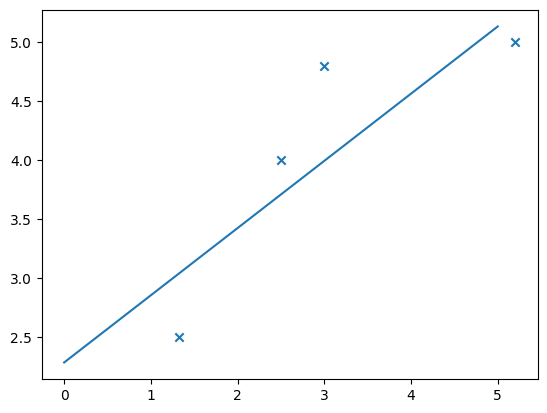

In [24]:
plt.scatter(x[:,0], y, marker = 'x')
plt.plot(w[1] * np.arange(6) + w[0])